# Data Structure and Processing

## Week 11

### Remarks:

1. Install the libraries listed below using your package manager.  An example of installing the library `numpy` is to issue a the following command on a terminal (in Ubuntu) `python3 -m pip install numpy`.

2. Make sure that you are following the conventions.  For examples, `import numpy as np`, which imports `numpy` packages and sets the abbreviation for it.

3. Do not import the packages without the short names, unless it is intentional.  Doing so might lead to a namespace conflict, or unintended uses of functions coming from two libraries as a part of different implementations.

4. We are assigning `None` to variables and use `pass` in the body of the functions, where we expect a solution from you.  Please replace these values and statements with your solution.

### Load Libraries

In [1]:
import numpy as np
import pandas as pd
import datetime as dtime
import matplotlib.pyplot as plt

### Task 1 (2pt)

In this task, you are requested to plot the same data in two different ways.

In Matplotlib, we can provide the data for `x` axis and `y` axis as, for example, lists, and in this order, and it plots the data points on a two dimensional picture, setting up automaticall the limits along the axes and labels.

Let us consider the file `IBM.csv`, from previous homework problems (also attached with this notebook), and do the following

1. Read the data from `IBM.csv` into a pandas `DataFrame`.
2. Reset the index to the timestamps provided by the `"Date"` column in the `df`
3. Plot the data provided by `"Open"` column using `DataFrame` method `plot()` (against the date it corresponds to)
4. Take the date column from the original `DataFrame` named `df` and using Python's builtin `list` function to convert it to a list of strings.  Let us call it `x`.
5. Do the same step as above for the column `"Open"`.  Let us give it the name `y`.
6. Plot `x` and `y` using Matplotlib.

**Remarks:**
1. Notice that the plotting these `x` and `y` using `Matplotlib` is much slower than the pandas method `plot`.  This should also explain a point from an earlier homework that the builtin `list` data type is much slower when its size is slower.

2. You might also want to provide the columns directly to `Matplotlib` to notice that this is also inefficient, i.e., it takes more time.

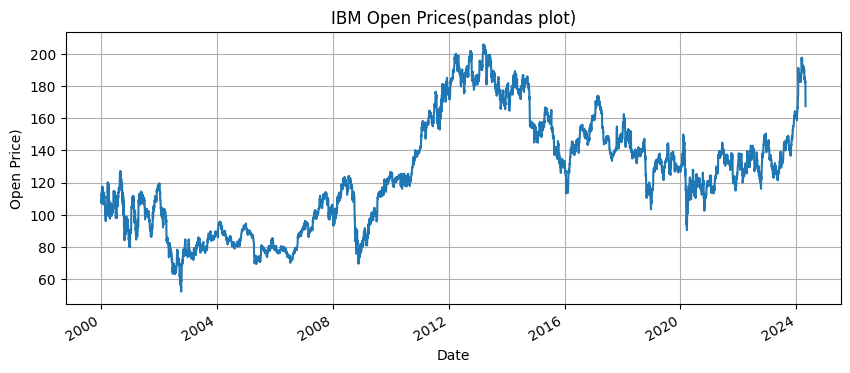

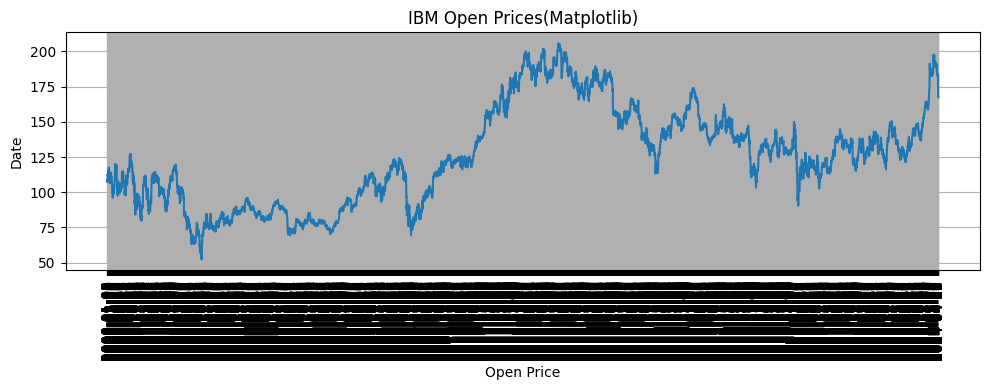

In [3]:

df = pd.read_csv("IBM (2).csv")

df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace=True)

df["Open"].plot(title="IBM Open Prices(pandas plot)", figsize=(10,4))
plt.ylabel("Open Price)")
plt.grid(True)
plt.show()

x = list(df.index.strftime("%Y-%m-%d"))
y = list(df["Open"])

plt.figure(figsize=(10,4))
plt.plot(x,y)
plt.title("IBM Open Prices(Matplotlib)")
plt.ylabel("Date")
plt.xlabel("Open Price")
plt.grid(True)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Task 2 (2pt)

Consider the data from the file `IBM.csv`. Your task is to create a subplots following the steps below:

1. Use pandas method `plot()` to create subplots for the columns `"Open"` and `"Close"`.
2. Create a vertically stacked histogram plot for the columns `"Open"` and `"Close"`.

**Remarks:**
1. Since pandas provides plotting of the `DataFrame`, but it is limited to what `Matplotlib` offers.  Since pandas used `Matplotlib`, therefore, any post processing or stacking or over-drawing of the plots provided by `Matplotlib` could be used.
2. You are encouraged to create get hold of the subplots and plot using `pandas`' method `plot()` to actually plot the data, or mixing with the normal plotting of the data with the `pandas` method `plot()`.  It is very normal we might need to create subplots with `pandas`' `DataFrame` and other subplots with, let us say, `numpy` arrays.

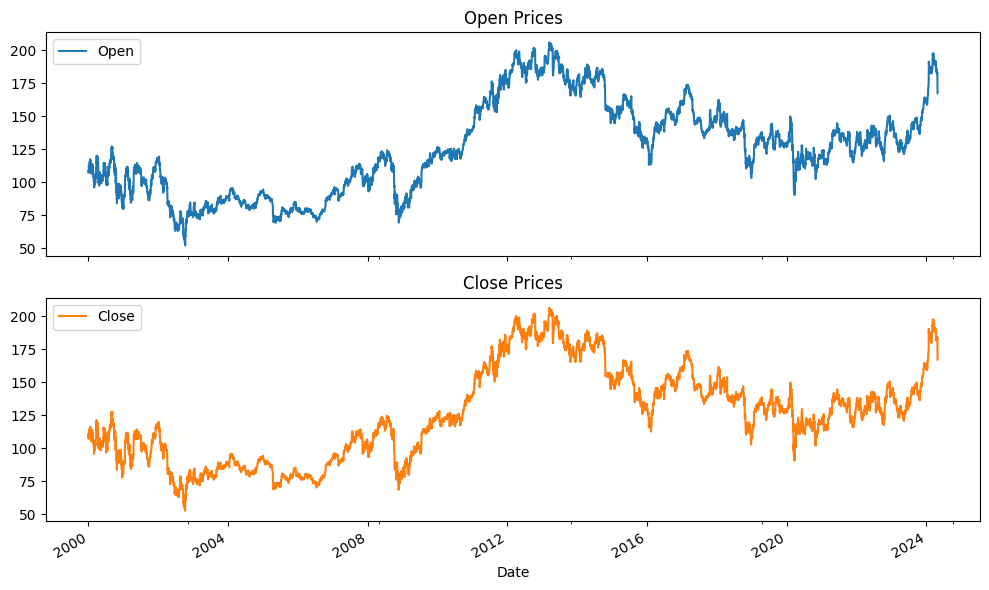

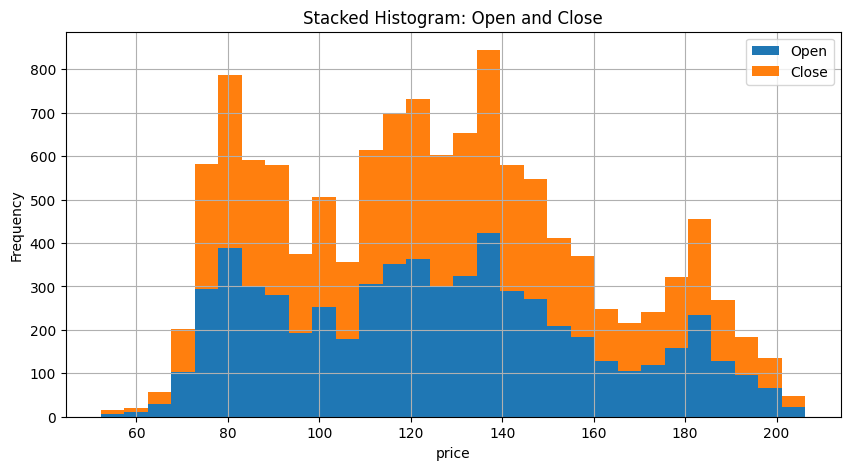

In [4]:
df = pd.read_csv("IBM (2).csv")
df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace=True)

df[["Open", "Close"]].plot(subplots=True, figsize=(10,6), title=["Open Prices","Close Prices"])
plt.tight_layout()
plt.show()

df[["Open","Close"]].plot(kind="hist", stacked=True, bins=30, figsize=(10,5),title="Stacked Histogram: Open and Close")
plt.xlabel("price")
plt.grid(True)
plt.show()

### Task 3 (3pt)

Reconsider the Task 1 above.  Your new task is to annotate and change the appearance of the plots as suggested below.

Recall that we have `df`, pandas `DataFrame`, with the index as dates.

1. Plot the values in the column `"Open"` in red color.
2. Annotate the maximum value with blue colored filled circle/point.
3. Annotate the minimum value with orange colored filled circle/point.
4. Point the maximum and minimun drawn above with a black arrow and a text describing what these points are.
4. Set the title of the plot to the string "Historical Opennings of IBM stocks with Max and Min"
5. Remove the any label along x axis.
6. Remove any legend.
7. Make sure the tics along the x-axis are vertically written, so that they are easy to read (written from bottom to top).
8. Finally save the plot to a two different formats: `png` and `svg`.

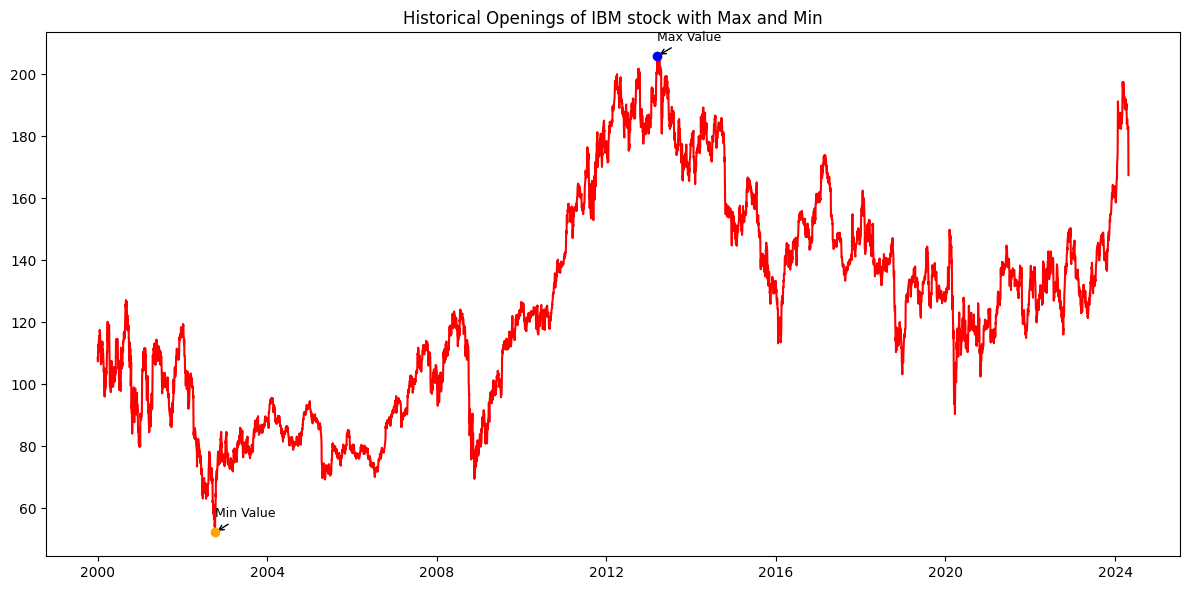

In [7]:
plt.figure(figsize=(12,6))
plt.plot(df.index, df["Open"], color="red")

max_val = df["Open"].max()
min_val = df["Open"].min()
max_date = df["Open"].idxmax()
min_date = df["Open"].idxmin()

plt.scatter(max_date, max_val, color="blue", label="Max", zorder=5)
plt.scatter(min_date, min_val, color="orange", label="Min", zorder=5)

plt.annotate("Max Value", xy=(max_date, max_val), xytext=(max_date,max_val + 5),
             arrowprops=dict(facecolor="black", arrowstyle="->"), fontsize=9)
plt.annotate("Min Value", xy=(min_date, min_val), xytext=(min_date,min_val + 5),
             arrowprops=dict(facecolor="black", arrowstyle="->"), fontsize=9)

plt.title("Historical Openings of IBM stock with Max and Min")

plt.xlabel("")
plt.legend().remove()
plt.tight_layout()
plt.savefig("open_prices.annotated.png")
plt.savefig("open_prices.annotated.svg")
plt.show()

### Task 4 (3pt)

 In this task, you will create a moving average visualization for the IBM stock data. Moving averages are commonly used in financial analysis to smooth out price data and identify trends.

 Using the same `IBM.csv` file:

 1. Load the data into a pandas DataFrame and set the index to the dates, as in Task 1.
 2. Calculate the 7-day and 30-day moving averages for the "Close" prices.
 3. Create a plot showing:
    - The original "Close" prices as a thin blue line
    - The 7-day moving average as a thicker red line
    - The 30-day moving average as a thicker green line
 4. Add a legend in the upper left corner explaining the three lines.
 5. Add a grid to the plot to make it easier to read values.
 6. Set appropriate title and y-axis label.
 7. Add vertical lines marking the first trading day of each year present in the dataset.

 **Remarks:**
 1. The pandas DataFrame has a convenient method `rolling()` that can be used to calculate moving averages.
 2. Remember that the first few values of a moving average will be NaN since there aren't enough previous values.
 3. Try to use pandas plotting capabilities first, and enhance the plot using Matplotlib functions as needed.

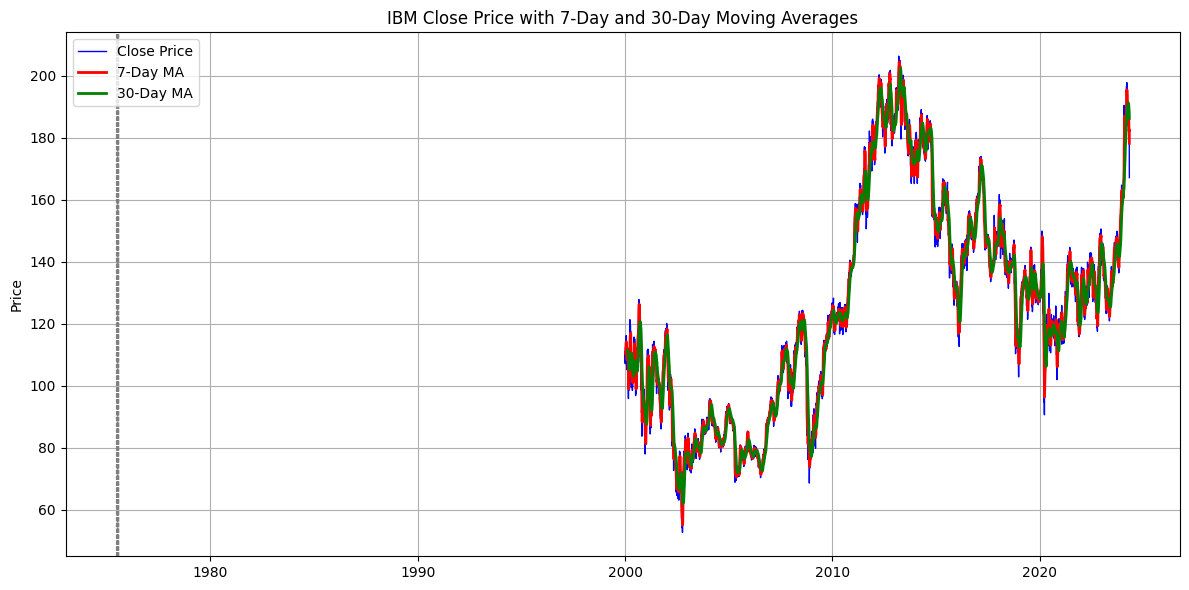

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar datos
df = pd.read_csv("IBM (2).csv")
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Calcular medias móviles de 7 y 30 días
df['MA_7'] = df['Close'].rolling(window=7).mean()
df['MA_30'] = df['Close'].rolling(window=30).mean()

# Crear gráfico
fig, ax = plt.subplots(figsize=(12, 6))

# Líneas de precios y medias móviles
ax.plot(df.index, df['Close'], color='blue', linewidth=1, label='Close Price')
ax.plot(df.index, df['MA_7'], color='red', linewidth=2, label='7-Day MA')
ax.plot(df.index, df['MA_30'], color='green', linewidth=2, label='30-Day MA')

# Añadir leyenda, grilla y etiquetas
ax.legend(loc='upper left')
ax.grid(True)
ax.set_title("IBM Close Price with 7-Day and 30-Day Moving Averages")
ax.set_ylabel("Price")

# Dibujar líneas verticales para el primer día de cada año
first_days = df.groupby(df.index.year).first().index
for day in first_days:
    ax.axvline(day, color='gray', linestyle='--', linewidth=0.8)

# Guardar imagen
plt.tight_layout()
plt.savefig("ibm_moving_avg.png")
plt.savefig("ibm_moving_avg.svg")
plt.show()

